# HOMEWORK 5

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### First Graph

In [2]:
hero_net  = pd.read_csv('hero-network.csv')

In [3]:
hero_net.drop(hero_net[hero_net['hero1'] == hero_net['hero2']].index,inplace=True)

In [4]:
hero_net.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [4]:
new = hero_net.groupby(['hero1','hero2']).hero2.count().reset_index(name="count") 

In [5]:
G1 = nx.Graph()

In [6]:
new.apply(lambda row :  G1.add_edge(row['hero1'],row['hero2'],weight=1/row['count']),axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
224164    None
224165    None
224166    None
224167    None
224168    None
Length: 224169, dtype: object

In [8]:
nx.info(G1)

C:\Users\Fedes\AppData\Local\Temp\ipykernel_22316\968434106.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G1)


'Graph with 6426 nodes and 167207 edges'

### Second Graph

In [7]:
nodes  = pd.read_csv('nodes.csv')

In [8]:
edges  =pd.read_csv('edges.csv')

In [9]:
G2 = nx.Graph()

In [10]:
edges.apply(lambda row :  G2.add_edge(row['hero'],row['comic']),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
96099    None
96100    None
96101    None
96102    None
96103    None
Length: 96104, dtype: object

In [20]:
nx.info(G2)

C:\Users\Fedes\AppData\Local\Temp\ipykernel_19764\1976782796.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G2)


'Graph with 19090 nodes and 96104 edges'

## Q4

In [19]:
def graph_n(graph:nx.Graph, N=None):
    """ Function to redute the graph to only the top N heroes """
    if N is None:
        return graph
    edges = pd.read_csv("edges.csv")
    h = edges.groupby("hero").count()   # extract the top n heroes
    
    top_n = h.sort_values(by="comic", ascending=False).head(N).index  # to a list
    n = edges[edges.hero.isin(top_n)]["comic"].to_list() # comic nodes that are linked to those heroes
    new_graph = graph.subgraph(top_n.to_list() + n).copy()    # create a subgraph based on the list
    return new_graph

In [12]:
def function_4(graph:nx.Graph, heroA, heroB, N=None, edges=False):
    """ Returns minimum set of links to disconnect heroA and heroB"""
    G = graph_n(graph, N)
    cut_set = nx.minimum_edge_cut(G, heroA.upper(), heroB.upper())
    if edges:
        return cut_set  # return the list of edges
    return len(cut_set) # return the number of edges

Trying the function with top 100 heroes:

In [27]:
function_4(G1,"CAPTAIN AMERICA","MR. FANTASTIC/REED R", 100)

78

## Q4 - visualization

In [41]:
original_graph = graph_n(G1,100)

edges = function_4(G1,"CAPTAIN AMERICA","MR. FANTASTIC/REED R", 100, edges=True)    # Find edges to remove

new_graph = original_graph.copy()    # Create new graph with the edges removed
new_graph.remove_edges_from(edges)
pos = nx.random_layout(new_graph)

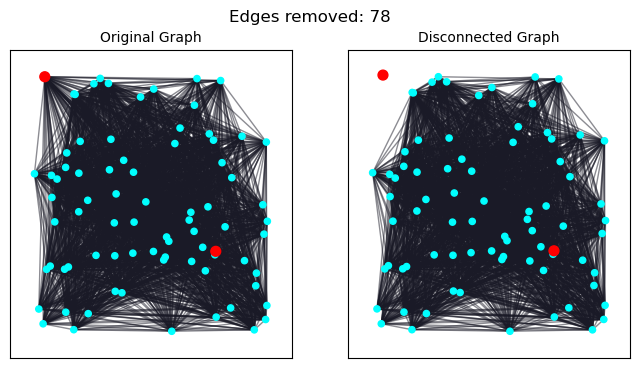

In [83]:
fig, ax = plt.subplots(1, 2, num=1, figsize=(8,4))

# Original graph with colors
color_o = ["red" if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else "cyan" for node in list(original_graph.nodes)]
size_o = [[50 if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else 20 for node in list(original_graph.nodes)]]

plt.suptitle(f"Edges removed: {len(edges)}\n")

plt.sca(ax[0])
ax[0].set_title("Original Graph", fontsize=10)
nx.draw_networkx(original_graph, pos=pos, node_size=size_o, edge_color=(.102, .102, .153, .5), with_labels=False, node_color=color_o)

# New disconnected graph
color_n = ["red" if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else "cyan" for node in list(new_graph.nodes)]
size_n = [[50 if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else 20 for node in list(new_graph.nodes)]]

plt.sca(ax[1])
ax[1].set_title("Disconnected Graph", fontsize=10)
nx.draw_networkx(new_graph, pos=pos, node_size=size_n, edge_color=(.102, .102, .153, .5), with_labels=False, node_color=color_n)


### Utils:

In [ ]:
import json

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

with open("pos.json","w") as f:
    json.dump(pos,f, cls=NumpyEncoder)

#with open("pos.json", "r") as f:
#    restored_pos = json.load(f)